# Exploratory Data Analysis
##### _Author: Calvin Chi_

---

First load the necessary packages and data.

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
from sklearn.cross_validation import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
import sklearn.preprocessing as pp
from sklearn.decomposition import PCA
from mpl_toolkits.mplot3d import Axes3D
import sys

File locations:

In [7]:
fileDir = "../data/payerChurnData.csv"
dataDir = "data/"

Read data:

In [8]:
data = pd.read_csv(fileDir)

Find out the data structure holding the data

In [207]:
print(type(data))

<class 'pandas.core.frame.DataFrame'>


Take a peek at the data...

In [208]:
data.head()

,idfa,rn,rev,hasemail,fb_friends,e_viptier,event_time,e_purchaseamount,credits,e_level,...,chb_4_3d,chb_3_2d,chb_2_1d,chb_24_12,chb_12_10,chb_10_08,chb_08_06,chb_06_04,chb_04_02,chb_02_00
0,77F4438A-A7E9-4BD9-8613-875405B96514,3,19.99,True,0,1,3/12/16 22:40,132000,78325,19,...,0,0,0,1,0,0,0,0,0,1
1,C9CA2440-1C45-40A5-A36E-4E2D5B90A989,51,14.99,False,0,3,3/25/16 20:36,112500,3469,110,...,2,2,0,0,0,0,0,0,0,0
2,A907C258-61A0-4288-9FC7-E1EB22488836,30,14.99,False,0,3,3/24/16 2:40,90000,1070,116,...,0,1,1,2,0,0,0,0,0,1
3,73E6FC14-9082-46C7-9472-956447221C93,6,14.99,False,0,2,3/4/16 3:08,90000,136,54,...,2,2,2,0,0,1,0,0,0,1
4,E9F53FFE-AAF2-4BE4-AFEC-4A0325DA616B,162,14.99,False,0,4,3/27/16 20:50,98900,41,227,...,14,16,15,9,0,0,1,0,0,2


Assess the dimensions and print total list of features

In [209]:
print("Dimensions")
print(data.shape)
print("\n")
print(data.columns.values[:20])

Dimensions
(72962, 148)


['idfa' 'rn' 'rev' 'hasemail' 'fb_friends' 'e_viptier' 'event_time'
 'e_purchaseamount' 'credits' 'e_level' 'hours_until' 'hours_prior' 'lapse'
 'ooc_21_14d' 'ooc_14_7d' 'ooc_7_6d' 'ooc_6_5d' 'ooc_5_4d' 'ooc_4_3d'
 'ooc_3_2d']


Let us view the distribution of classes in our dataset.

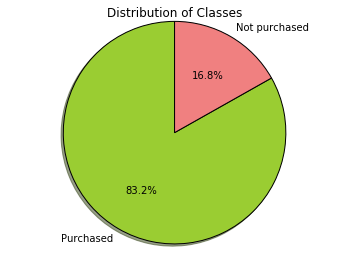

In [210]:
%matplotlib inline
labels = 'Purchased', 'Not purchased'
positive = sum(data['lapse'] == 1)
negative = sum(data['lapse'] == 0)
sizes = [positive, negative]
colors = ['yellowgreen', 'lightcoral']
plt.pie(sizes, labels=labels, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=90)
plt.axis('equal')
plt.title("Distribution of Classes")
plt.show()

Features that represent unique IDs are not generalizable for classification and should be removed.

In [9]:
del data['idfa']
del data['rn']
del data['event_time']
del data['hours_until']
del data['hours_prior']

Set the labels.

In [10]:
y = data['lapse']
del data['lapse']

Convert boolean for whether a user submitted email or not to 1 for yes and 0 for no.

In [11]:
data['hasemail'] = data['hasemail'].astype(int)
print(data['hasemail'][:10])

0    1
1    0
2    0
3    0
4    0
5    0
6    0
7    1
8    0
9    0
Name: hasemail, dtype: int64


In [12]:
colNames = data.columns.values
print(data.shape)

(72962, 142)


Scale each feature in the data matrix so that each feature has zero mean and unit variance.

In [13]:
dataScale = pp.scale(data)

Let us whiten the data and plot a PCA of the total data

In [13]:
pca = PCA(n_components=142, whiten=True)
pca_transformed = pca.fit_transform(dataScale)
print(pca_transformed.shape)

(72962, 142)


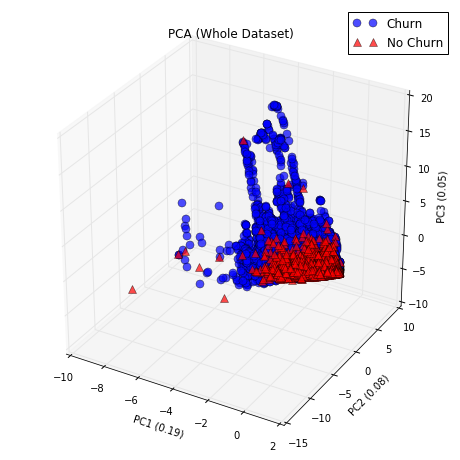

In [14]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
posIdx = np.where(y == 1)[0]
negIdx = np.where(y == 0)[0]
ax.plot(pca_transformed[posIdx, 0], pca_transformed[posIdx, 1], pca_transformed[posIdx, 2], 'o', markersize=8, 
        color='blue', alpha=0.7, label='Churn')
ax.plot(pca_transformed[negIdx,0], pca_transformed[negIdx, 1], pca_transformed[negIdx, 2], '^', markersize=8, 
        alpha=0.7, color='red', label='No Churn')
ax.set_xlabel('PC1 (%.2f)' % (pca.explained_variance_ratio_[0]))
ax.set_ylabel('PC2 (%.2f)'% (pca.explained_variance_ratio_[1]))
ax.set_zlabel('PC3 (%.2f)' % (pca.explained_variance_ratio_[2]))
plt.title("PCA (Whole Dataset)")
ax.legend(loc='upper right')
plt.show()

Let us see how well our three components "capture" the total structure of the data.

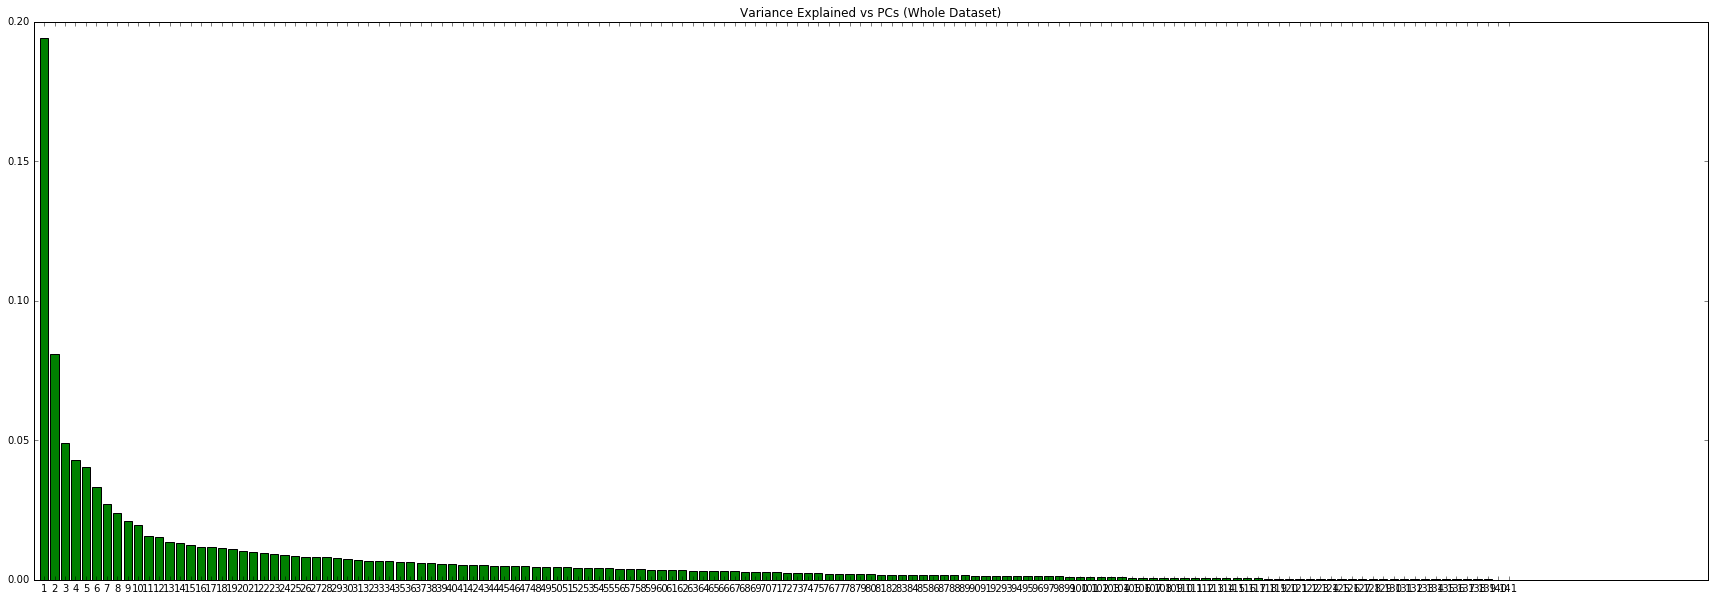

In [219]:
plt.figure(figsize=(30,10))
plt.title("Variance Explained vs PCs (Whole Dataset)")
plt.bar(list(range(1, len(pca.explained_variance_ratio_) + 1)), pca.explained_variance_ratio_,
       color="g", align="center")
plt.xticks(list(range(1, len(pca.explained_variance_ratio_))), list(range(1, len(pca.explained_variance_ratio_))))
plt.show()

It looks like our first three PCs do a reasonable job in capturing the structure of the data compared with the rest of the components. Let us perform PCA again, but this time without the time series data:

In [221]:
dataSubset = data.ix[:, :7]
pca = PCA(n_components=7, whiten=True)
pca_transformed = pca.fit_transform(dataSubset)

Plot:

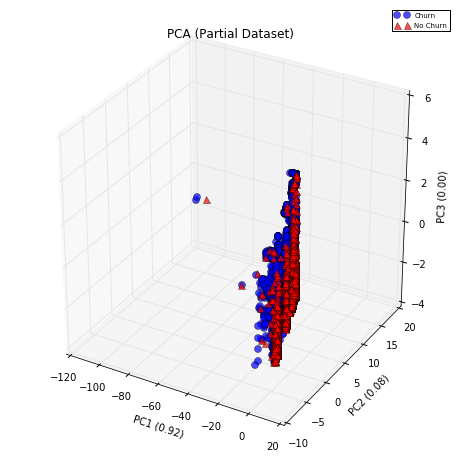

In [222]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
posIdx = np.where(y == 1)[0]
negIdx = np.where(y == 0)[0]
ax.plot(pca_transformed[posIdx, 0], pca_transformed[posIdx, 1], pca_transformed[posIdx, 2], 'o', 
        markersize=7, color='blue', alpha=0.7, label='Churn')
ax.plot(pca_transformed[negIdx,0], pca_transformed[negIdx, 1], pca_transformed[negIdx, 2], '^', 
        markersize=7, alpha=0.7, color='red', label='No Churn')
ax.set_xlabel('PC1 (%.2f)' % (pca.explained_variance_ratio_[0]))
ax.set_ylabel('PC2 (%.2f)'% (pca.explained_variance_ratio_[1]))
ax.set_zlabel('PC3 (%.2f)' % (pca.explained_variance_ratio_[2]))
plt.title("PCA (Partial Dataset)")
ax.legend(loc='upper right')
plt.show()

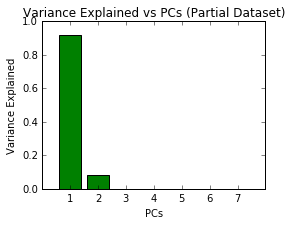

In [232]:
plt.figure(figsize=(4,3))
plt.title("Variance Explained vs PCs (Partial Dataset)")
plt.bar(list(range(1, len(pca.explained_variance_ratio_) + 1)), pca.explained_variance_ratio_,
       color="g", align="center")
plt.xticks(list(range(1, len(pca.explained_variance_ratio_) + 1)), 
           list(range(1, len(pca.explained_variance_ratio_) + 1)))
plt.ylim([0, 1])
plt.xlabel("PCs")
plt.ylabel("Variance Explained")
plt.show()

Keeping the time series data makes the data look more separable. Let's look at the data two components at a time. PC1 vs PC2:

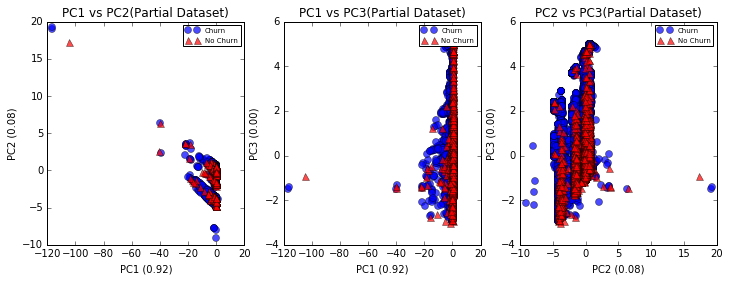

In [234]:
fig = plt.figure(figsize=(12,4))
PCs = [(0, 1), (0, 2), (1, 2)]
i = 1
for pc in PCs:
    ax = fig.add_subplot(130 + i)
    ax.plot(pca_transformed[posIdx, pc[0]], pca_transformed[posIdx, pc[1]], 'o', markersize=7, color='blue', 
            alpha=0.7, label='Churn')
    ax.plot(pca_transformed[negIdx,pc[0]], pca_transformed[negIdx, pc[1]], '^', markersize=7, alpha=0.7, 
            color='red', label='No Churn')
    ax.set_xlabel('PC' + str(pc[0] + 1) + ' (%.2f)' % (pca.explained_variance_ratio_[pc[0]]))
    ax.set_ylabel('PC' + str(pc[1] + 1) + ' (%.2f)'% (pca.explained_variance_ratio_[pc[1]]))
    plt.rcParams['legend.fontsize'] = 7
    plt.title("PC" + str(pc[0] + 1) + " vs " + "PC" + str(pc[1] + 1) +  "(Partial Dataset)")
    ax.legend(loc='upper right')
    i += 1
plt.show()

It looks like the time series data collected will be useful in distinguishing those who churn and those who don't. The type of time series data we have are:

1. Number of out of credit dialogs per unit time
2. Number of session starts per unit time
3. Number of heartbeats per unit time
4. Number of quality wins per unit time
5. Number of spins per unit time
6. Number of levelups per unit time
7. Number of purchases per unit time
8. Sum of revenue in period
9. Number of hourly bonus collections

Let us plot each individual feature against time to see if there are any differences between churn and no churn.

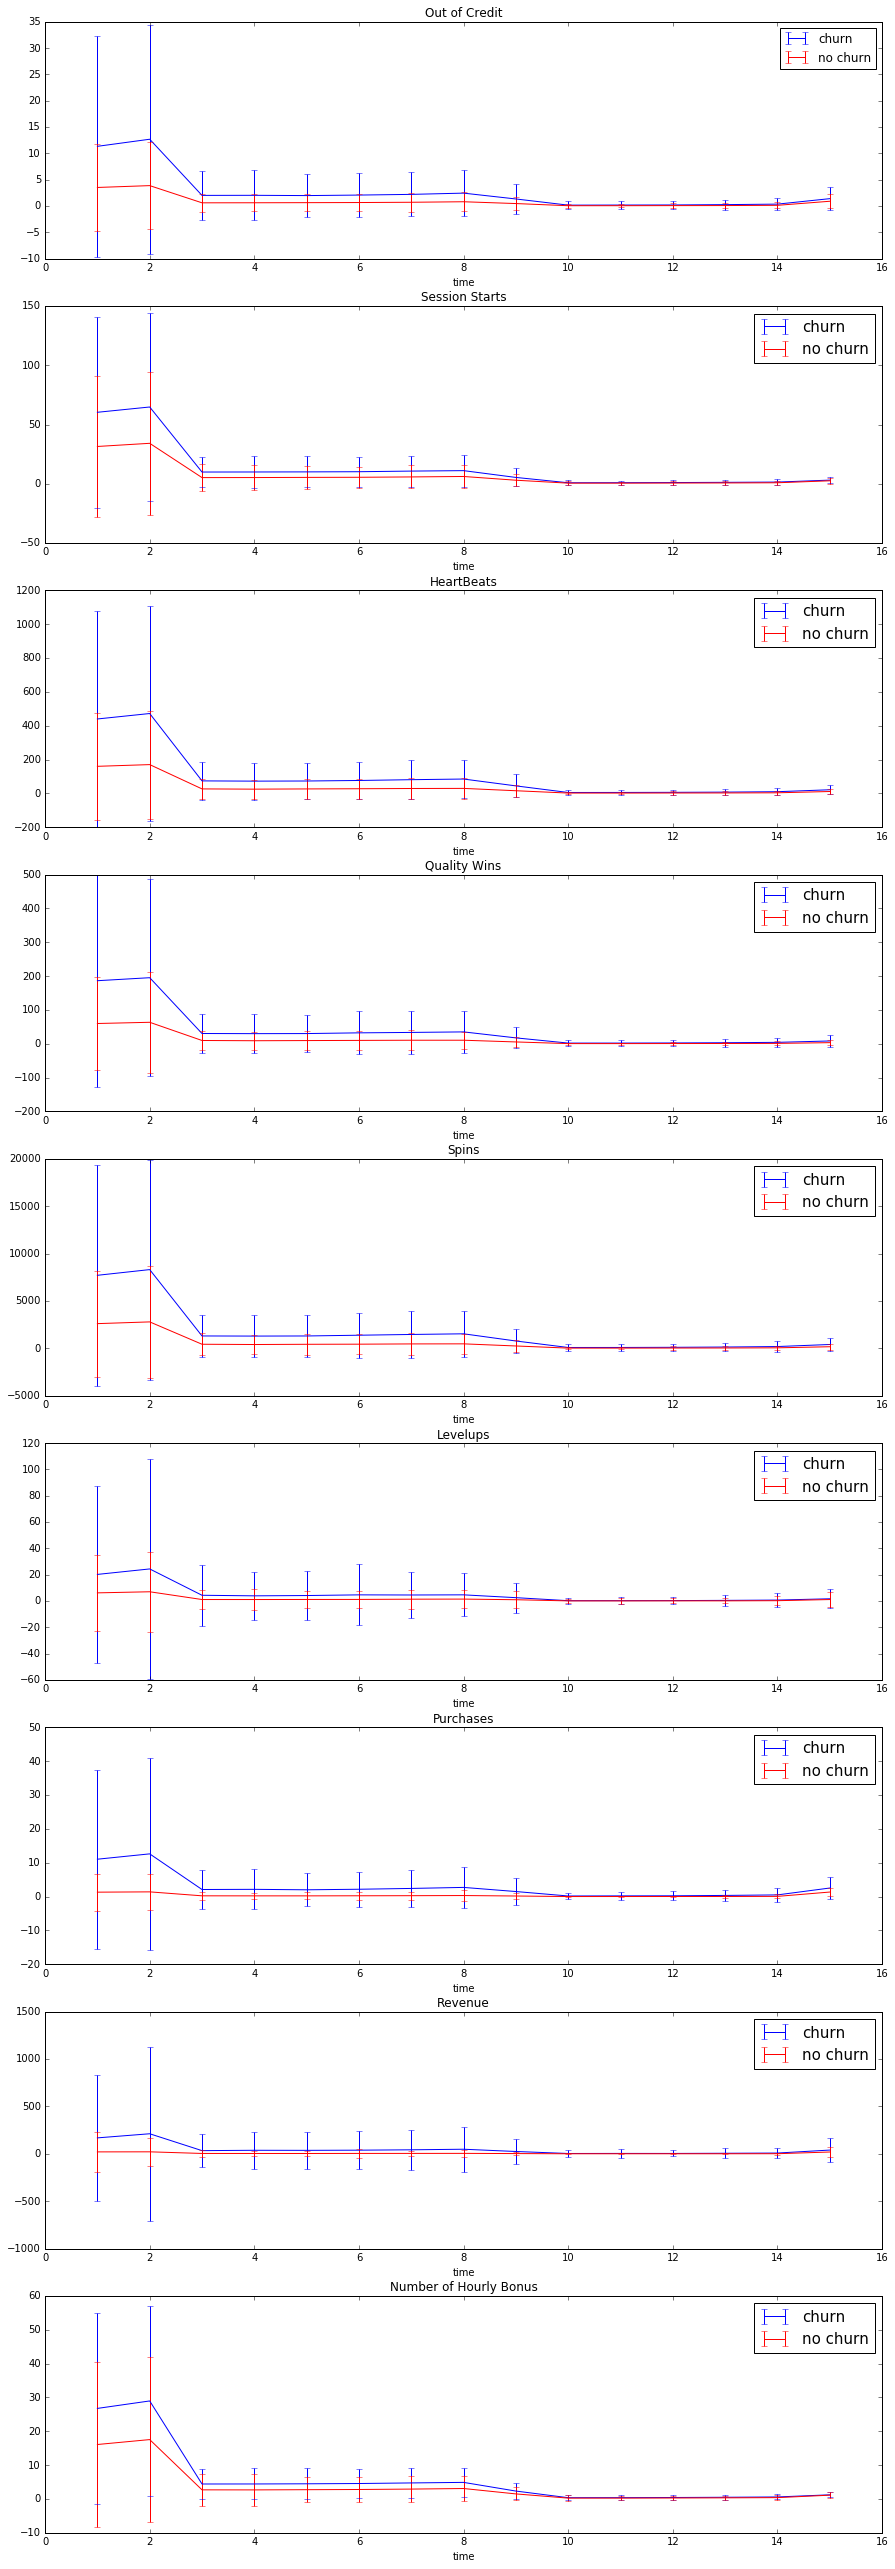

In [15]:
dataSubset = data.ix[:, 7:data.shape[1]]
fig = plt.figure(figsize = (15, 45))
titles = ["Out of Credit", "Session Starts", "HeartBeats", "Quality Wins", "Spins", "Levelups", "Purchases", 
         "Revenue", "Number of Hourly Bonus"]
counter = 0

for i in range(0, 135, 15):
    ax = fig.add_subplot(910 + counter + 1)
    pos = dataSubset.ix[posIdx, i:i+15]
    neg = dataSubset.ix[negIdx, i:i+15]
    posMean = pos.apply(np.mean)
    negMean = neg.apply(np.mean)
    posStd = pos.apply(np.std)
    negStd = neg.apply(np.std)
    ax.errorbar(list(range(1, 16)), posMean, yerr=posStd, color='blue', label="churn")
    ax.errorbar(list(range(1, 16)), negMean, yerr=negStd, color='red', label="no churn")
    ax.set_xlabel("time")
    ax.set_title(titles[counter])
    ax.legend(loc='upper right')
    plt.rcParams['legend.fontsize'] = 15
    counter += 1

A couple of observations can be made from these plots:

1. In general, churn players have higher mean feature values than non-churn players, although the significance is not known.
2. In general, churn players have larger standard deviations than non-churn players.
3. At the hour level time scale, churn players are less distinguishable from non-churn players

These observations suggest that churn players in general have more volatile experiences than non-churn playes, it may be possible to separate churn players from non-churn players based on volatility. These observations also suggest that neural nets may be a viable option to classification, since the trends between churn players and non-churn players may be visibly different. 

We will create our new features as the number of times a feature value exceeds or goes below 1-2 standard deviations from the mean value over time.

In [28]:
newFeatures = {}
features = ["oocNew", "ssNew", "hbNew", "qwNew", "spinsNew", "lpNew", "purchaseNew", 
         "revNew", "bonusNew"]
counter = 0

for i in range(0, 135, 15):
    sub = dataSubset.ix[:, i:i+8].as_matrix()
    means = np.mean(sub, axis=1).reshape(sub.shape[0], 1)
    stds = np.std(sub, axis=1).reshape(sub.shape[0], 1)
    bounds = means + stds
    truth = (sub > means + 1*stds) | (sub < means - 1*stds)
    newFeatures[counter] = np.sum(truth, axis=1)
    counter += 1

newFeatures = pd.DataFrame(newFeatures)
newFeatures.columns = features
newFeatures.head()

,oocNew,ssNew,hbNew,qwNew,spinsNew,lpNew,purchaseNew,revNew,bonusNew
0,0,0,0,0,0,0,0,0,0
1,1,2,1,1,1,1,1,2,2
2,2,1,3,1,2,5,2,2,1
3,2,2,1,2,2,1,1,2,2
4,1,2,2,2,2,1,1,1,2


Let us see how well our newly created features separate out churn players from non-churn players.

In [29]:
newFeatures = newFeatures.as_matrix()

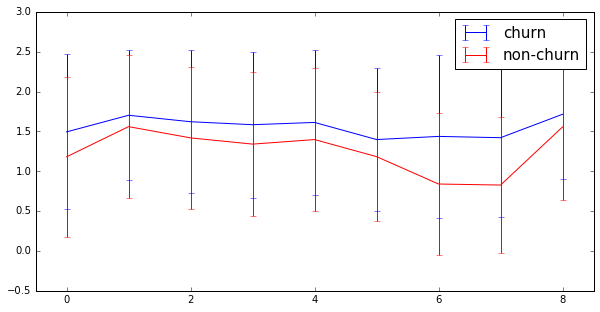

In [30]:
pos = newFeatures[posIdx, :]
neg = newFeatures[negIdx, :]
posMeans = np.mean(pos, axis=0)
posStds = np.std(pos, axis=0)
negMeans = np.mean(neg, axis=0)
negStds = np.std(neg, axis=0)
plt.figure(figsize = (10, 5))
plt.errorbar(list(range(len(features))), posMeans, yerr=posStds, color="blue", label="churn")
plt.errorbar(list(range(len(features))), negMeans, yerr=negStds, color="red", label="non-churn")
plt.xlim([-0.5, 8.5])
plt.legend(loc="upper right")
plt.show()

We see that the number of purchases per unit time and revenue per unit time are the two features with the largest difference in volatility between churn and non-churn players. Let us add the newly created features to our original dataset.

In [32]:
newFeatures = pd.DataFrame(newFeatures)
newFeatures.columns = features
print(data.shape)
print(newFeatures.shape)
newData = pd.concat([data, newFeatures], axis=1)
print(newData.shape)

(72962, 142)
(72962, 9)
(72962, 151)


Let's train a decision tree, and see how well a decision tree performs on our testset

In [33]:
Xtrain, Xtest, ytrain, ytest = train_test_split(newData, y, test_size=0.33)
clf = DecisionTreeClassifier(max_depth=7)
clf.fit(Xtrain, ytrain)
print("Prediction accuracy on test dataset: ")
print(clf.score(Xtest, ytest))

Prediction accuracy on test dataset: 
0.831422875654


In [361]:
tree.export_graphviz(clf, out_file='output/tree.dot') 

Let us save our modified dataset

In [35]:
import pickle
pickle.dump(Xtrain, open(dataDir + "Xtrain.p", 'wb'))
pickle.dump(ytrain, open(dataDir + "ytrain.p", 'wb'))
pickle.dump(Xtest, open(dataDir + "Xtest.p", 'wb'))
pickle.dump(ytest, open(dataDir + "ytest.p", 'wb'))

Load our modified dataset

In [3]:
import pickle
Xtrain = pickle.load(open(dataDir + "Xtrain.p", "rb"))
ytrain = pickle.load(open(dataDir + "ytrain.p", "rb"))
Xtest = pickle.load(open(dataDir + "Xtest.p", "rb"))
ytest = pickle.load(open(dataDir + "ytest.p", "rb"))

Import Calvin's decision tree, which will output all the top features used to separate the classes.

In [4]:
from DecisionTree import DecisionTree

In [5]:
clf2 = DecisionTree(stop=0.65, output=True)
clf2.train(Xtrain, ytrain)

Let's see how well Calvin's decision tree performs on the test set.

In [13]:
pred = clf2.predict(Xtest)
print("Test set accuracy:")
print(np.mean(pred == ytest))

Test set accuracy:
0.834247030484


In [6]:
attributes = clf2.attributes
print(attributes)

['pv_14_7d', 'rev_2_1d', 'pv_02_00', 'pv_2_1d', 'sp_02_00', 'hb_24_12', 'pv_3_2d', 'qw_02_00', 'ooc_4_3d', 'sp_10_08', 'rev_6_5d', 'pv_21_14d', 'rev_10_08', 'rev_12_10', 'sp_24_12', 'ss_3_2d', 'chb_3_2d', 'credits', 'pv_6_5d', 'ss_04_02', 'rev_04_02', 'e_viptier', 'lu_24_12', 'pv_12_10']


It looks like the best features are the time-series data, of which number of purchases seem to be the best. The best none time-series data are `credit` and `e_viptier`. 

In [21]:
idx = np.where(np.in1d(colNames, attributes))[0]
dataSubset = dataScale[:, idx]
print(dataSubset.shape)

(72962, 24)


Let us see how separable the two classes are with these selected 24 features.

In [22]:
pca = PCA(n_components=24, whiten=True)
pca_transformed = pca.fit_transform(dataSubset)
print(pca_transformed.shape)

(72962, 24)


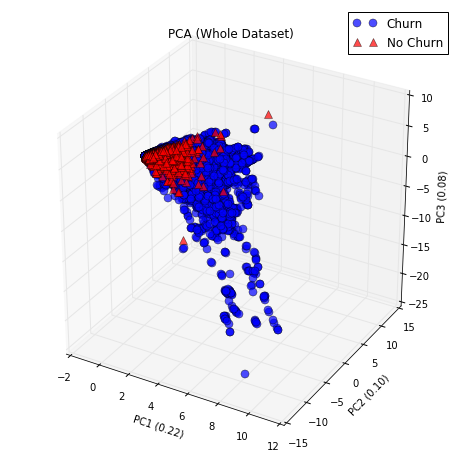

In [23]:
%matplotlib inline
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(111, projection='3d')
posIdx = np.where(y == 1)[0]
negIdx = np.where(y == 0)[0]
ax.plot(pca_transformed[posIdx, 0], pca_transformed[posIdx, 1], pca_transformed[posIdx, 2], 'o', markersize=8, 
        color='blue', alpha=0.7, label='Churn')
ax.plot(pca_transformed[negIdx,0], pca_transformed[negIdx, 1], pca_transformed[negIdx, 2], '^', markersize=8, 
        alpha=0.7, color='red', label='No Churn')
ax.set_xlabel('PC1 (%.2f)' % (pca.explained_variance_ratio_[0]))
ax.set_ylabel('PC2 (%.2f)'% (pca.explained_variance_ratio_[1]))
ax.set_zlabel('PC3 (%.2f)' % (pca.explained_variance_ratio_[2]))
plt.title("PCA (Whole Dataset)")
ax.legend(loc='upper right')
plt.show()

We see a slight improvement in the clustering of the samples into their own classes.